# Logistic Regression algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


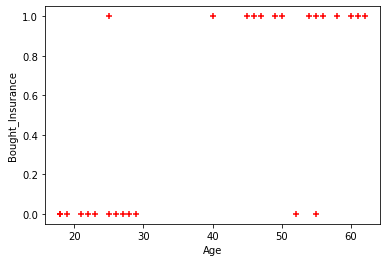

In [3]:
# plot scatter plot to understand the data 

plt.xlabel('Age')
plt.ylabel('Bought_Insurance')

plt.scatter(df.age, df.bought_insurance, color = 'red', marker = '+')


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)

In [7]:
X_train

,age
15,55
1,25
2,47
10,18
4,46
0,22
8,62
17,58
18,19
11,28


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
model.predict(X_test)

array([1, 0, 1], dtype=int64)

In [16]:
X_test

,age
3,52
20,21
9,61


In [12]:
model.score(X_test, y_test)

0.6666666666666666

In [17]:
model.predict_proba(X_test)

array([[0.07770779, 0.92229221],
       [0.92228354, 0.07771646],
       [0.01964035, 0.98035965]])

# Exercise - employee retention assessment

In [18]:
# Now do some Exploratory Data analysis to figure out which variables have direct 
# and clear impact on employee retention (whether they leave the company or continue to work) 

In [19]:
# Plot bar chart showing impact of employee salary on retention

In [20]:
# Plt bar chart showing correlation between department and employee retention

In [21]:
# Now build logistic regression model using variables that were narrowed down to 1

In [22]:
# Measure the accuracy of the model 

In [23]:
df_hr = pd.read_csv('HR_comma_sep.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [28]:
# check if any missing values in the data
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory data analysis 

In [37]:
# size of the data
df_hr.shape

(14999, 10)

In [43]:
# size of employee left the organisation
left = df_hr[df_hr.left==1]
left.shape

(3571, 10)

In [44]:
# size of employee left the organisation
retained = df_hr[df_hr.left==0]
retained.shape

(11428, 10)

In [47]:
# average numbers of the column
df_hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### From the above stastistics , it can be seen that 
### 1. Satisfaction level - Employees leaving the organisation with low satisfaction (~44%) compared to remain ###                                      in the company (66%)
### 2. Average monthly hours - Employees who spend more hours in the company, tend to leave compared to ###                                                 employee who spend less hours
### 3. Promotion in the last 5 years - Employees who have been promoted tends to retain in the company 
###                                                         compared to employee who have not been promoted.

### The other parameters like last evaluation, no of projects, time spent in the company and work accident are ###  not significantly varying between employees who left the organisation and retained in the organisation , ###  hence did not consider in the Logistic regression.  


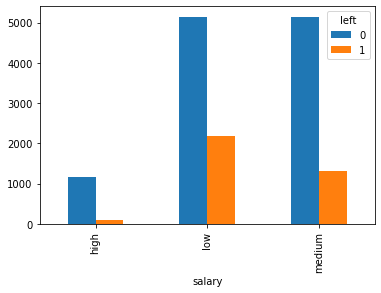

In [51]:
# Plot bar chart showing impact of employee salary on retention

pd.crosstab(df_hr.salary, df_hr.left).plot(kind = 'bar')

# Below bar chart shows that employee with high salary less likely to leave the organisation 

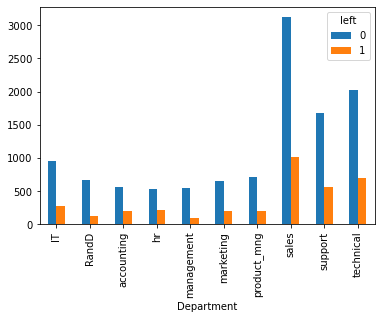

In [53]:
# Plt bar chart showing correlation between department and employee retention
pd.crosstab(df_hr.Department, df_hr.left).plot(kind = 'bar')

# It can be seen from below bar chart that employee retention does not depend significantly on department (limited to a few dept)

In [65]:
# From EDA,it can be concluded that Satisfation level, Average Monthly hours, Promotion in the last 5 years and Salary make impcat on empolyee retention/leaving, 
# hence taken in indepedent variable and left is considered as dependent variable 
X_hr = df_hr[['satisfaction_level', 'average_montly_hours','promotion_last_5years', 'salary']]
X_hr.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [66]:
# convert catogorical values in the salary column using dummy variable
salary_dummy = pd.get_dummies(X.salary, prefix = "salary")
salary_dummy

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [67]:
# concate the dummy dataframe with original dataframe
X_hr_dummy = pd.concat([X_hr, salary_dummy], axis = 1)
X_hr_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [68]:
# drop the salaray column
X_hr_dummy.drop('salary', axis = 1, inplace = True)
X_hr_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [69]:
# dependent variable assign to y
y_hr = df_hr.left
y_hr.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [78]:
# using train and test split method prepare the data
from sklearn.model_selection import train_test_split
X_hr_train, X_hr_test, y_hr_train, y_hr_test = train_test_split(X_hr_dummy, y_hr, test_size = 0.3)

In [79]:
# build the Logistic regression model
from sklearn.linear_model import LogisticRegression
model_hr = LogisticRegression()

In [80]:
model_hr.fit(X_hr_train, y_hr_train)

LogisticRegression()

In [82]:
# prediction of the Logistic model

model_hr.predict(X_hr_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [83]:
# Accuracy of the model
model_hr.score(X_hr_test, y_hr_test)

0.7682222222222223